#1

#2

#2

开始谱聚类...


谱聚类完成...


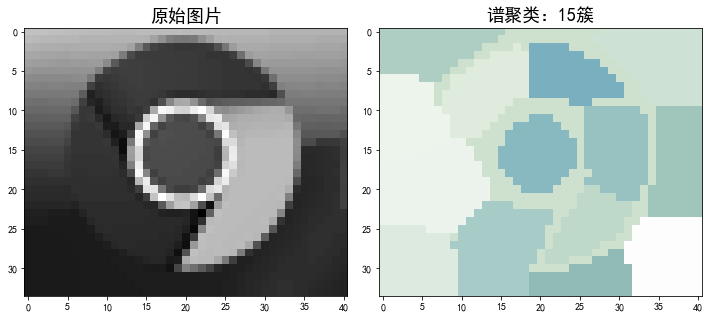

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.cluster import spectral_clustering
from sklearn.feature_extraction import image
from PIL import Image

matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

pic = Image.open('data/Chrome.png')
pic = pic.convert('L')
data = np.array(pic).astype(np.float) / 255

plt.figure(figsize=(10, 5), facecolor='w')
plt.subplot(121)
plt.imshow(pic, cmap=plt.cm.gray, interpolation='nearest')
plt.title(u'原始图片', fontsize=18)
n_clusters = 15

affinity = image.img_to_graph(data)
beta = 3
affinity.data = np.exp(-beta * affinity.data / affinity.data.std()) + 10e-5
# a = affinity.toarray()
# b = np.diag(a.diagonal())
# a -= b
print('开始谱聚类...')
y = spectral_clustering(affinity, n_clusters=n_clusters, assign_labels='kmeans', random_state=1)
print('谱聚类完成...')
y = y.reshape(data.shape)
for n in range(n_clusters):
    data[y == n] = n
plt.subplot(122)
clrs = []
for c in np.linspace(16776960, 16711935, n_clusters):
    clrs.append('#%06d' % c)
cm = matplotlib.colors.ListedColormap(clrs)
plt.imshow(data, cmap=cm, interpolation='nearest')
plt.title(u'谱聚类：%d簇' % n_clusters, fontsize=18)
plt.tight_layout()
plt.show()